# Chile Wildfire Hotspots Dataset

Chile Hotspots

Libraries we need are imported first

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

Data used in this exercise is stored in the DATA folder

In [101]:
data = '../../../DATA/chile_fire_cluster_sequence_v2.json'

The dataframe is created using the .read_csv function of Pandas

In [86]:
hotspot = pd.read_json(data)

The original CSV file is structured as a dataframe with the corresponding categories

In [89]:
hotspot

,id,lat,lon,gsd,acquisition_time,detection_time,mir_bt,tir_bt,confidence,frp,...,satellite,algorithm,mir_bt_avg,tir_bt_avg,mir_threshold,tir_threshold,delta_bt_avg,frp_uncertainty,delta_bt_thr,hotspot_class
0,340503774,-37.573338,-72.809982,375.0,2023-02-20 06:24:06+00:00,2023-02-20 11:14:14+00:00,300.264648,286.906799,0.500000,0.933132,...,SUOMI-NPP,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,340482670,-37.574661,-72.804817,750.0,2023-02-20 05:32:20+00:00,2023-02-20 07:15:37+00:00,295.815796,287.405548,0.650321,4.064853,...,NOAA-20,OT-S,281.463673,283.431368,290.0,280.431368,-1.967695,0.792725,NaN,NaN
2,340482669,-37.572521,-72.815674,750.0,2023-02-20 05:32:20+00:00,2023-02-20 07:15:37+00:00,291.642822,287.766937,0.505038,2.574483,...,NOAA-20,OT-S,281.463673,283.431368,290.0,280.431368,-1.967695,0.613863,NaN,NaN
3,340482981,-37.574902,-72.813324,375.0,2023-02-20 05:32:09+00:00,2023-02-20 07:16:58+00:00,304.782867,287.029938,0.500000,2.369543,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,340482980,-37.575958,-72.807961,375.0,2023-02-20 05:32:09+00:00,2023-02-20 07:16:58+00:00,327.564240,288.805969,0.500000,3.982046,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60841,335107255,-37.501709,-72.593956,375.0,2023-02-02 18:30:02+00:00,2023-02-02 20:23:03+00:00,333.399139,308.330200,0.500000,11.441710,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60842,335107257,-37.498184,-72.594635,375.0,2023-02-02 18:30:02+00:00,2023-02-02 20:23:03+00:00,301.725189,311.209747,0.250000,11.441710,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,335107254,-37.501087,-72.589027,375.0,2023-02-02 18:30:02+00:00,2023-02-02 20:23:03+00:00,336.259949,311.073761,0.500000,13.985281,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60844,335107256,-37.497562,-72.589722,375.0,2023-02-02 18:30:02+00:00,2023-02-02 20:23:03+00:00,336.952362,310.423584,0.500000,13.985281,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
hotspot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60846 entries, 0 to 60845
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                60846 non-null  int64              
 1   lat               60846 non-null  float64            
 2   lon               60846 non-null  float64            
 3   gsd               60846 non-null  float64            
 4   acquisition_time  60846 non-null  datetime64[ns, UTC]
 5   detection_time    60846 non-null  datetime64[ns, UTC]
 6   mir_bt            28200 non-null  float64            
 7   tir_bt            27009 non-null  float64            
 8   confidence        60808 non-null  float64            
 9   frp               45863 non-null  float64            
 10  normalized_frp    45863 non-null  float64            
 11  landuse_class     60846 non-null  int64              
 12  product_id        60846 non-null  int64              
 13  s

In [93]:
hotspot = hotspot[hotspot['mir_bt'].notna()]
hotspot

,id,lat,lon,gsd,acquisition_time,detection_time,mir_bt,tir_bt,confidence,frp,...,satellite,algorithm,mir_bt_avg,tir_bt_avg,mir_threshold,tir_threshold,delta_bt_avg,frp_uncertainty,delta_bt_thr,hotspot_class
0,340503774,-37.573338,-72.809982,375.0,2023-02-20 06:24:06+00:00,2023-02-20 11:14:14+00:00,300.264648,286.906799,0.500000,0.933132,...,SUOMI-NPP,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,340482670,-37.574661,-72.804817,750.0,2023-02-20 05:32:20+00:00,2023-02-20 07:15:37+00:00,295.815796,287.405548,0.650321,4.064853,...,NOAA-20,OT-S,281.463673,283.431368,290.0,280.431368,-1.967695,0.792725,NaN,NaN
2,340482669,-37.572521,-72.815674,750.0,2023-02-20 05:32:20+00:00,2023-02-20 07:15:37+00:00,291.642822,287.766937,0.505038,2.574483,...,NOAA-20,OT-S,281.463673,283.431368,290.0,280.431368,-1.967695,0.613863,NaN,NaN
3,340482981,-37.574902,-72.813324,375.0,2023-02-20 05:32:09+00:00,2023-02-20 07:16:58+00:00,304.782867,287.029938,0.500000,2.369543,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,340482980,-37.575958,-72.807961,375.0,2023-02-20 05:32:09+00:00,2023-02-20 07:16:58+00:00,327.564240,288.805969,0.500000,3.982046,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60841,335107255,-37.501709,-72.593956,375.0,2023-02-02 18:30:02+00:00,2023-02-02 20:23:03+00:00,333.399139,308.330200,0.500000,11.441710,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60842,335107257,-37.498184,-72.594635,375.0,2023-02-02 18:30:02+00:00,2023-02-02 20:23:03+00:00,301.725189,311.209747,0.250000,11.441710,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,335107254,-37.501087,-72.589027,375.0,2023-02-02 18:30:02+00:00,2023-02-02 20:23:03+00:00,336.259949,311.073761,0.500000,13.985281,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60844,335107256,-37.497562,-72.589722,375.0,2023-02-02 18:30:02+00:00,2023-02-02 20:23:03+00:00,336.952362,310.423584,0.500000,13.985281,...,NOAA-20,VIIRS-Active-Fire-Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After renaming the variable of the dataframe, we use .describe() to see essential statistics for each variable

In [96]:
hotspot.describe()

,id,lat,lon,gsd,mir_bt,tir_bt,confidence,frp,normalized_frp,landuse_class,product_id,mir_bt_avg,tir_bt_avg,mir_threshold,tir_threshold,delta_bt_avg,frp_uncertainty,delta_bt_thr,hotspot_class
count,2.820000e+04,28200.000000,28200.000000,28200.000000,28200.000000,27009.000000,28162.000000,28118.000000,28118.000000,28200.000000,2.820000e+04,5904.000000,5904.000000,5904.000000,5904.000000,5904.000000,11675.000000,1515.000000,1191.0
mean,3.359259e+08,-37.448948,-72.809730,634.811170,337.652039,302.842955,0.664308,71.561628,182.985593,511.842199,7.149836e+06,290.947706,292.199825,293.374227,289.119207,-1.252119,14.450758,1.443389,1.0
std,7.171192e+05,0.166550,0.120703,283.304189,29.941237,13.293389,0.253153,229.270159,431.784404,7.267070,1.968901e+04,7.649316,7.395392,6.031235,7.668099,1.593849,35.580892,2.203225,0.0
min,3.350144e+08,-37.758617,-73.131378,375.000000,207.934128,267.489742,0.000000,0.146357,0.941960,510.000000,7.123717e+06,275.224376,278.323241,290.000000,270.000000,-5.781295,0.212158,0.004307,1.0
25%,3.354360e+08,-37.585068,-72.866232,375.000000,315.398262,293.789092,0.500000,6.457025,21.383465,510.000000,7.136724e+06,285.765898,287.221816,290.000000,284.000188,-2.297391,2.465708,0.545929,1.0
50%,3.355014e+08,-37.444923,-72.785809,375.000000,334.287552,300.094849,0.501514,18.109147,52.720927,510.000000,7.138241e+06,288.730899,289.405695,290.000000,286.405695,-0.695115,4.894977,1.178048,1.0
75%,3.363531e+08,-37.322226,-72.716476,1000.000000,351.890152,307.042236,0.936190,50.862084,156.711977,510.000000,7.163736e+06,293.684754,293.112953,293.684754,290.112953,0.001436,12.148007,1.715404,1.0
max,3.405038e+08,-37.060635,-72.556319,1100.000000,610.989502,400.068268,1.000000,8336.817383,9989.883250,580.000000,7.274698e+06,312.399391,313.556397,312.399391,310.556397,2.751480,843.257198,15.000000,1.0


We now make scatterplots for a number of variables 

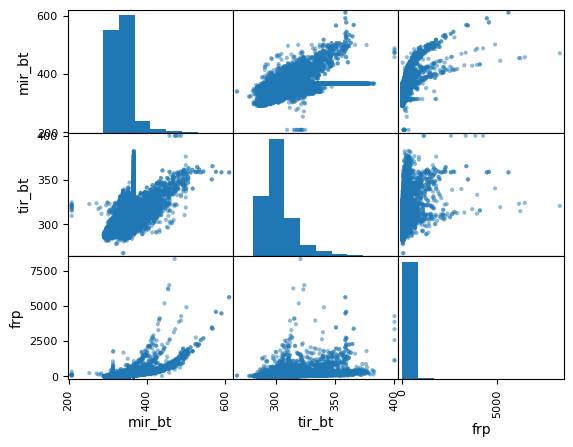

In [99]:
pd.plotting.scatter_matrix(hotspot[['mir_bt', 'tir_bt', 'frp']]);